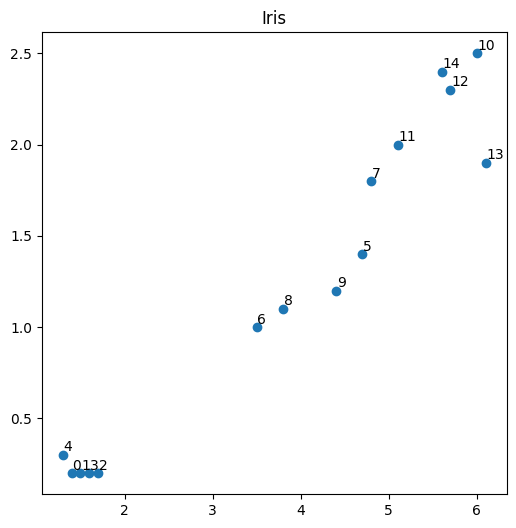

In [1]:
"""Hierarchical Clustering sample using Ward's method.
"""
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster


X = load_iris().data[::10, 2:4]

figure = plt.figure(figsize=(6, 6))
axis = figure.add_subplot(
    1,
    1,
    1,
    title='Iris'
)
plt.scatter(
    X[:, 0],
    X[:, 1]
)
# Number each element for use in tree diagrams.
for i, elem in enumerate(X):
    plt.text(
        elem[0] + 0.01,
        elem[1] + 0.02,
        i
    )

plt.show()

In [2]:
# Hierarchical clustering using scipy.
Z = linkage(
    X,
    # Specification distance function.
    method='ward',
    # Definition of point-to-point distance.
    metric='euclidean'
)
pd.DataFrame(Z)

,0,1,2,3
0,2.0,3.0,0.100000,2.0
1,0.0,1.0,0.100000,2.0
2,12.0,14.0,0.141421,2.0
3,4.0,16.0,0.208167,3.0
4,6.0,8.0,0.316228,2.0
5,5.0,9.0,0.360555,2.0
6,7.0,11.0,0.360555,2.0
7,15.0,18.0,0.390726,5.0
8,10.0,17.0,0.439697,3.0
9,13.0,23.0,0.735980,4.0


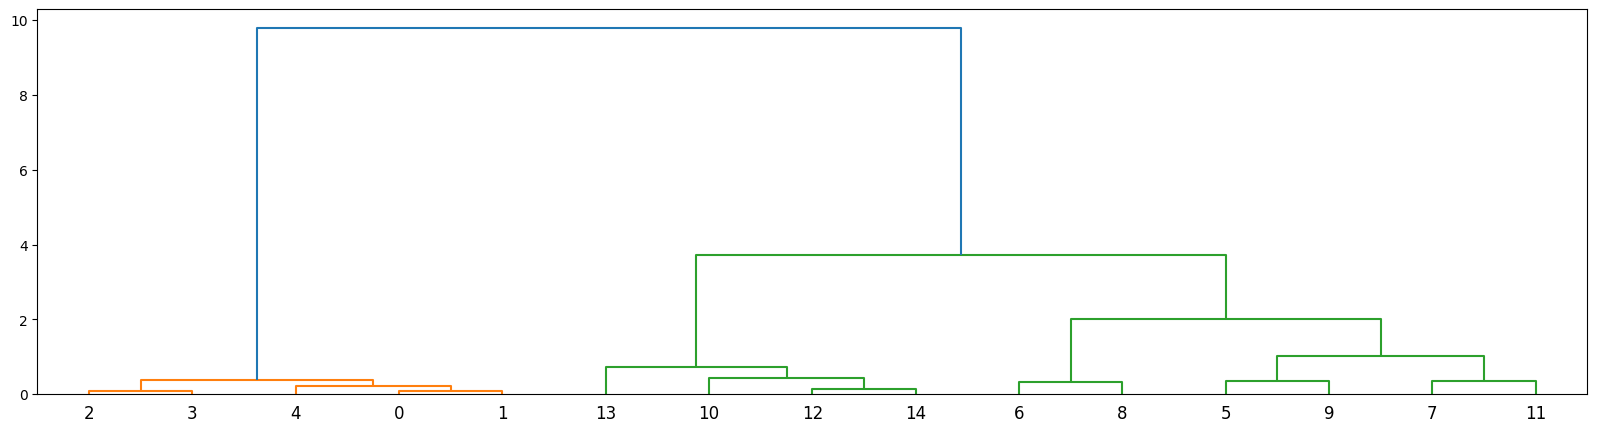

In [3]:
# Plot Dendrogram.
fig_2, ax_2 = plt.subplots(figsize=(20, 5))
ax_2 = dendrogram(Z)
fig_2.show()

In [4]:
# List what number of data belongs to which cluster.
def print_cluster_affiliations_list(threshold: int | float, criterion: str) -> None:
    clusters = fcluster(
        Z,
        t=threshold,
        criterion=criterion
    )
    for i, c in enumerate(clusters):
        print(i, c)


print_cluster_affiliations_list(
    3,
    'maxclust'
)

0 1
1 1
2 1
3 1
4 1
5 3
6 3
7 3
8 3
9 3
10 2
11 3
12 2
13 2
14 2


In [5]:
# Specify threshold by distance.
print_cluster_affiliations_list(
    1.6,
    'distance'
)

0 1
1 1
2 1
3 1
4 1
5 4
6 3
7 4
8 3
9 4
10 2
11 4
12 2
13 2
14 2
